In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# Read the datasets
acquisition_data = pd.read_csv('C:/Users/ADMIN/Documents/credicard_data/Customer Acqusition.csv')
repayment_data = pd.read_csv('C:/Users/ADMIN/Documents/credicard_data/Repayment.csv')
spend_data = pd.read_csv('C:/Users/ADMIN/Documents/credicard_data/Spend.csv')
print(acquisition_data)
print(repayment_data)
print(spend_data)

     No Customer  Age        City   Product     Limit Company        Segment
0     1       A1   76   BANGALORE      Gold  500000.0      C1  Self Employed
1     2       A2   71    CALCUTTA    Silver  100000.0      C2   Salaried_MNC
2     3       A3   34      COCHIN  Platimum   10000.0      C3   Salaried_Pvt
3     4       A4   47      BOMBAY  Platimum   10001.0      C4           Govt
4     5       A5   56   BANGALORE  Platimum   10002.0      C5  Normal Salary
..  ...      ...  ...         ...       ...       ...     ...            ...
95   96      A96   54     CHENNAI    Silver  100000.0     C19   Salaried_Pvt
96   97      A97   58  TRIVANDRUM  Platimum   10000.0     C20           Govt
97   98      A98   51    CALCUTTA  Platimum   10001.0     C21  Normal Salary
98   99      A99   35    CALCUTTA  Platimum   10002.0     C22  Self Employed
99  100     A100   36      COCHIN    Silver  100000.0      C5   Salaried_MNC

[100 rows x 8 columns]
      SL No: Customer      Month     Amount  Unnamed

1a. In case age is less than 18, replace it with mean of age values
1b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
1c. Incase the repayment amount is more than the limit, replace the repayment with the
limit.

In [26]:
# Preprocess Customer Acquisition dataset
mean_age = acquisition_data['Age'].mean()
acquisition_data.loc[acquisition_data['Age'] < 18, 'Age'] = mean_age

# Preprocess Repayment dataset
repayment_data['Customer'] = repayment_data['Customer'].fillna(method='ffill')  # Fill NaN values in 'Customer' column
repayment_data['Amount'] = repayment_data.apply(lambda row: min(row['Amount'], acquisition_data.loc[row['Customer'], 'Limit']), axis=1)

# Preprocess Spend dataset
spend_data['Amount'] = spend_data.apply(lambda row: min(row['Amount'], 0.5 * acquisition_data.loc[row['Customer'], 'Limit']), axis=1)

# Print the preprocessed datasets
print("Customer Acquisition dataset:")
print(acquisition_data)
print("\nRepayment dataset:")
print(repayment_data)
print("\nSpend dataset:")
print(spend_data)

KeyError: 'A1'

2. From the above dataset create the following summaries:
a. How many distinct customers exist?
b. How many distinct categories exist?
c. What is the average monthly spend by customers?
d. What is the average monthly repayment by customers?
e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
(Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment– Monthly spend. Interest is earned only on positive profits and not on negative amounts)
f. What are the top 5 product types?
g. Which city is having maximum spend?
h. Which age group is spending more money?
i. Who are the top 10 customers in terms of repayment?

In [27]:
# Merge the datasets
merged_data = pd.merge(acquisition_data, repayment_data, on='Customer', how='inner')
merged_data = pd.merge(merged_data, spend_data, on='Customer', how='inner')

# Add 'Month' column based on the available dates in the repayment data
repayment_data['Month'] = pd.to_datetime(repayment_data['Month'], format='%d-%b-%y').dt.strftime('%b-%y')
merged_data = pd.merge(merged_data, repayment_data[['Customer', 'Month']], on='Customer', how='inner')

# Calculate the summaries
# a. How many distinct customers exist?
distinct_customers = merged_data['Customer'].nunique()

# b. How many distinct categories exist?
distinct_categories = merged_data['Product'].nunique()

# c. What is the average monthly spend by customers?
average_monthly_spend = merged_data.groupby(['Customer', 'Month'])['Amount_x'].mean()

# d. What is the average monthly repayment by customers?
average_monthly_repayment = merged_data.groupby(['Customer', 'Month'])['Amount_y'].mean()

# e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
monthly_profit = (merged_data['Amount_y'] - merged_data['Amount_x']).clip(lower=0) * 0.029

# f. What are the top 5 product types?
top_5_product_types = merged_data['Type'].value_counts().head(5)

# g. Which city is having maximum spend?
city_with_max_spend = merged_data.groupby('City')['Amount_x'].sum().idxmax()

# h. Which age group is spending more money?
age_group_spending = merged_data.groupby(pd.cut(merged_data['Age'], bins=[0, 18, 30, 40, 50, 60, 100], labels=['<18', '18-30', '30-40', '40-50', '50-60', '60+']))['Amount_x'].sum().idxmax()

# i. Who are the top 10 customers in terms of repayment?
top_10_customers_repayment = merged_data.groupby('Customer')['Amount_y'].sum().nlargest(10)

# Print the summaries

print("Distinct customers:", distinct_customers)
print("Distinct categories:", distinct_categories)
print("Average monthly spend by customers:\n", average_monthly_spend)
print("Average monthly repayment by customers:\n", average_monthly_repayment)
print("Monthly profit for the bank:\n", monthly_profit)
print("Top 5 product types:\n", top_5_product_types)
print("City with maximum spend:", city_with_max_spend)
print("Age group spending more money:", age_group_spending)
print("Top 10 customers in terms of repayment:\n", top_10_customers_repayment)


Distinct customers: 100
Distinct categories: 3
Average monthly spend by customers:
 Customer  Month 
A1        Apr-06    264093.981667
          Feb-04    264093.981667
          Feb-05    264093.981667
          Jan-04    264093.981667
          Jan-05    264093.981667
                        ...      
A95       Jan-04    369405.960000
A96       Jan-04    310992.300000
A97       Jan-04    121874.900000
A98       Jan-04    337815.570000
A99       Jan-04     25682.730000
Name: Amount_x, Length: 798, dtype: float64
Average monthly repayment by customers:
 Customer  Month 
A1        Apr-06    285705.708889
          Feb-04    285705.708889
          Feb-05    285705.708889
          Jan-04    285705.708889
          Jan-05    285705.708889
                        ...      
A95       Jan-04    240401.500000
A96       Jan-04     54729.660000
A97       Jan-04    139018.260000
A98       Jan-04    284521.060000
A99       Jan-04     90184.220000
Name: Amount_y, Length: 798, dtype: float64
Month

3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same

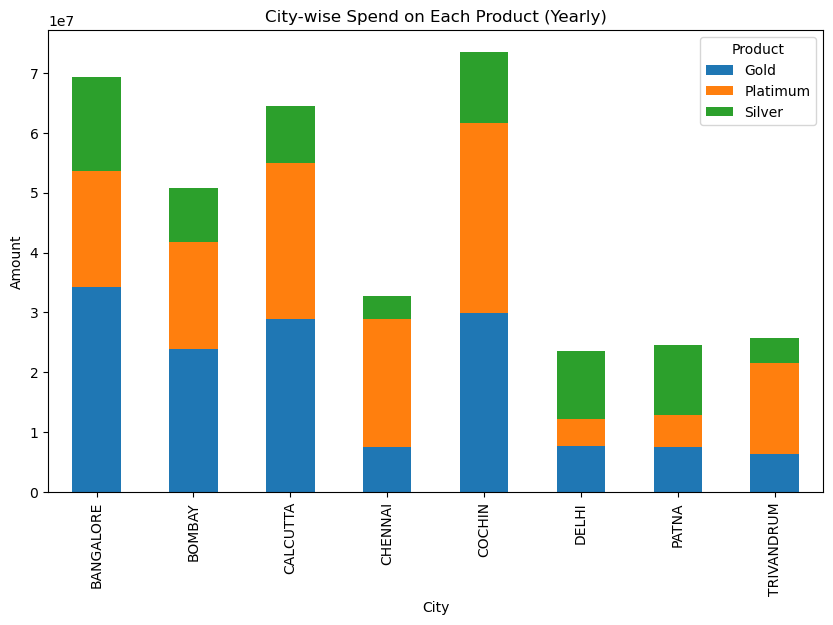

In [29]:
# Merge Customer Acquisition data with Spend data
merged_data = pd.merge(acquisition_data, spend_data, on='Customer')

# Extract year from Month column in Spend data
merged_data['Year'] = pd.to_datetime(merged_data['Month']).dt.year

# Group by City, Product, and Year and calculate sum of Amount
grouped_data = merged_data.groupby(['City', 'Product', 'Year'])['Amount'].sum().reset_index()

# Pivot the data to reshape it
pivot_table = pd.pivot_table(grouped_data, values='Amount', index='City', columns='Product', aggfunc='sum')

# Plot stacked bar chart
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('City-wise Spend on Each Product (Yearly)')
plt.xlabel('City')
plt.ylabel('Amount')
plt.legend(title='Product')

plt.show()

4. Create graphs for
a. Monthly comparison of total spends, city wise

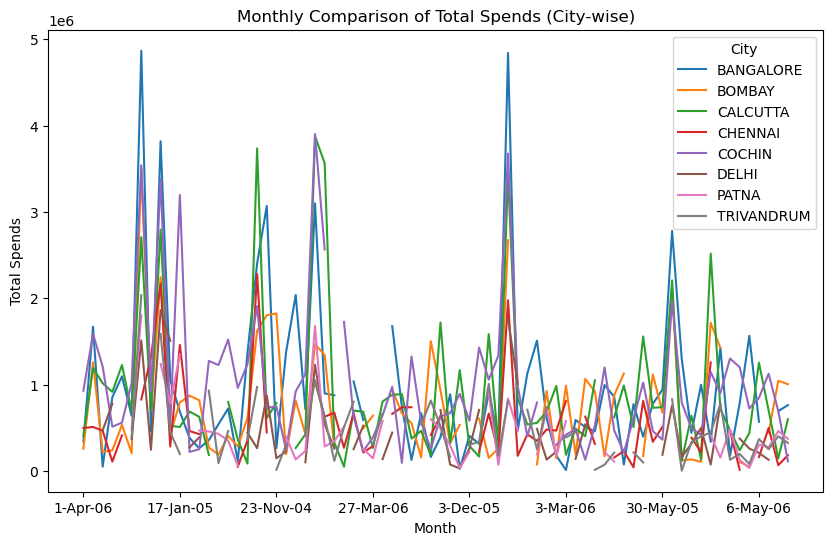

In [30]:
# Group the data by Month and City and calculate sum of Amount
grouped_data = merged_data.groupby(['Month', 'City'])['Amount'].sum().reset_index()

# Pivot the data to reshape it
pivot_table = pd.pivot_table(grouped_data, values='Amount', index='Month', columns='City', aggfunc='sum')

# Plot line chart
pivot_table.plot(kind='line', figsize=(10, 6))
plt.title('Monthly Comparison of Total Spends (City-wise)')
plt.xlabel('Month')
plt.ylabel('Total Spends')
plt.legend(title='City')

plt.show()

4b. Comparison of yearly spend on air tickets

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6212\278858176.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_ticket_data['Year'] = pd.to_datetime(air_ticket_data['Month']).dt.year


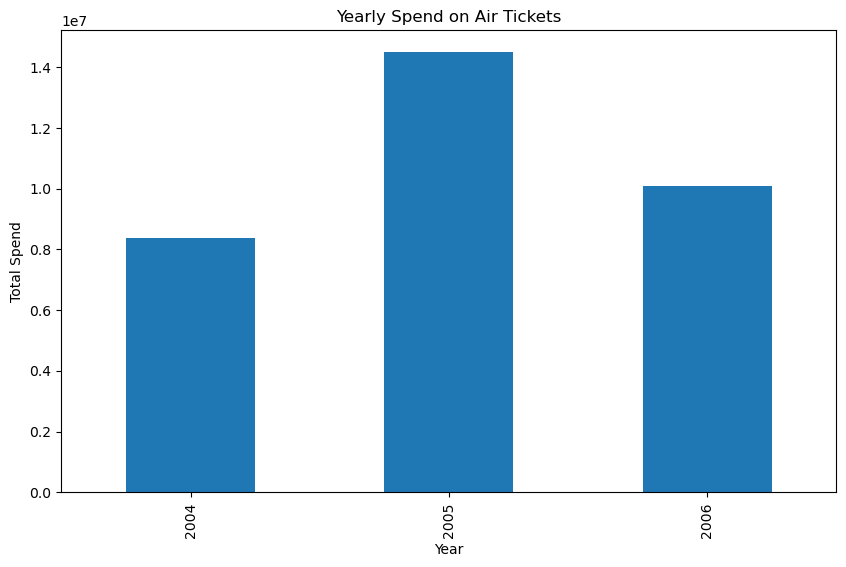

In [33]:
# Filter data for AIR TICKET product
air_ticket_data = merged_data[merged_data['Type'] == 'AIR TICKET']

# Extract the year from the Month column
air_ticket_data['Year'] = pd.to_datetime(air_ticket_data['Month']).dt.year

# Group by Year and calculate sum of Amount
yearly_spend = air_ticket_data.groupby('Year')['Amount'].sum()

# Plot bar chart
yearly_spend.plot(kind='bar', figsize=(10, 6))
plt.title('Yearly Spend on Air Tickets')
plt.xlabel('Year')
plt.ylabel('Total Spend')

plt.show()

4c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

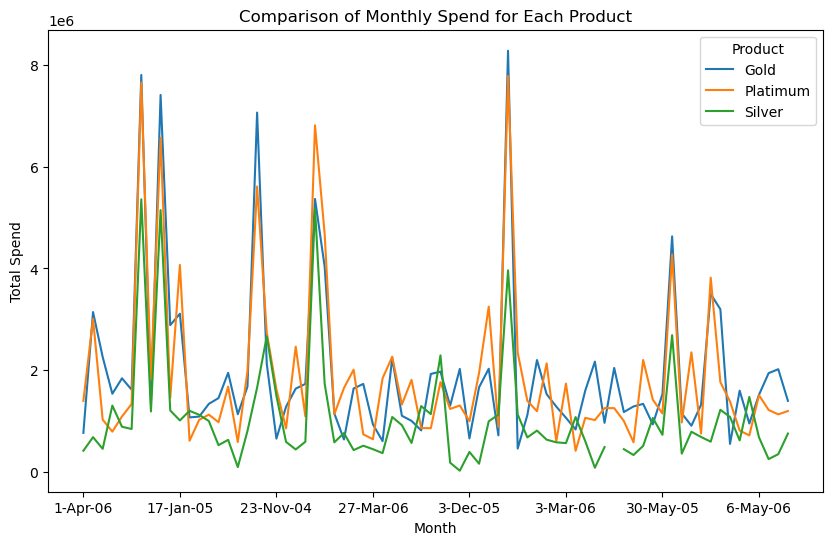

In [32]:
# Group the data by Month and Product and calculate sum of Amount
grouped_data = merged_data.groupby(['Month', 'Product'])['Amount'].sum().reset_index()

# Pivot the data to reshape it
pivot_table = pd.pivot_table(grouped_data, values='Amount', index='Month', columns='Product', aggfunc='sum')

# Plot line chart
pivot_table.plot(kind='line', figsize=(10, 6))
plt.title('Comparison of Monthly Spend for Each Product')
plt.xlabel('Month')
plt.ylabel('Total Spend')
plt.legend(title='Product')

plt.show()

In [34]:
def top_10_customers_by_repayment(data, city, product, time_period):
    # Filter data based on specified city and product
    filtered_data = data[(data['City'] == city) & (data['Product'] == product)]
    
    # Convert Month column to datetime format
    filtered_data['Month'] = pd.to_datetime(filtered_data['Month'])
    
    # Group data by specified time period and calculate sum of repayment amount for each customer
    if time_period == 'yearly':
        grouped_data = filtered_data.groupby([filtered_data['Month'].dt.year, 'Customer'])['Amount'].sum()
    elif time_period == 'monthly':
        grouped_data = filtered_data.groupby([filtered_data['Month'].dt.year, filtered_data['Month'].dt.month, 'Customer'])['Amount'].sum()
    else:
        print("Invalid time period. Please choose 'yearly' or 'monthly'.")
        return
    
    # Sort the grouped data by repayment amount in descending order
    sorted_data = grouped_data.sort_values(ascending=False)
    
    # Get the top 10 customers
    top_10_customers = sorted_data.groupby(level=[0, 1]).head(10)
    
    return top_10_customers


In [35]:
# Assuming the merged dataset is stored in a variable called merged_data
top_10_customers = top_10_customers_by_repayment(merged_data, 'BANGALORE', 'Gold', 'monthly')
print(top_10_customers)


Month  Month  Customer
2004   1      A1          2239644.04
2006   3      A43         1768163.06
2005   2      A14         1714236.95
       5      A43         1707685.54
       2      A13         1511836.35
                             ...    
2006   3      A88           26518.91
       12     A30           26024.81
       8      A13           25860.69
       11     A14            9819.62
2005   12     A30             720.30
Name: Amount, Length: 72, dtype: float64


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6212\1560796436.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Month'] = pd.to_datetime(filtered_data['Month'])
